<a href="https://colab.research.google.com/github/trong-khanh-1109/CS231.M13.KHCL/blob/main/Garbage_Classification_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd '/content'
!gdown https://drive.google.com/uc?id=1C8BEEW_Lw4AUj4tHYNEjKaJIA6nnqYS3 # old
# !gdown https://drive.google.com/uc?id=1cexqei_xiWRnw6ne0vyYK5g7LFlc2kbn #new

/content
Downloading...
From: https://drive.google.com/uc?id=1C8BEEW_Lw4AUj4tHYNEjKaJIA6nnqYS3
To: /content/Garbage classification 1.zip
100% 56.7M/56.7M [00:01<00:00, 40.1MB/s]


In [ ]:
!unzip '/content/Garbage classification 1.zip'

In [ ]:
from google.colab import drive
drive._mount('/content/gdrive')

# Import library

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from keras.layers.merge import concatenate
from sklearn.metrics import classification_report, confusion_matrix

FJoin = os.path.join

# Data preprocessing

In [ ]:
path = '/content/Garbage classification'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20, # Dữ liệu được tạo ra sẽ được xoay ngẫu nhiên một góc trong phạm vi +rotation_rangeđến -rotation_range(tính bằng độ)
        width_shift_range = 0.2, # Dịch theo chiều ngang ngẫu nhiên trong một phạm vi nào đó
        height_shift_range = 0.2, # Dịch ảnh theo chiều dọc trong một phạm vi nào đó
        horizontal_flip = True, # lật ảnh ngẫu nhiên theo chiều ngang
        vertical_flip = True, # lật ảnh ngẫu nhiên theo chiều dọc
)

validation_datagen = ImageDataGenerator(
        rescale = 1./255
)

test_datagen = ImageDataGenerator(
        rescale = 1./255
)

In [ ]:
img_shape = (224, 224, 3)
train_batch_size = 16
val_batch_size = 16

train_generator = train_datagen.flow_from_directory(
            path + '/train',
            target_size = (img_shape[0], img_shape[1]),
            batch_size = train_batch_size,
            class_mode = 'categorical',)

validation_generator = validation_datagen.flow_from_directory(
            path + '/validation',
            target_size = (img_shape[0], img_shape[1]),
            batch_size = val_batch_size,
            class_mode = 'categorical',
            shuffle=False)

test_generator = test_datagen.flow_from_directory(
            path + '/test',
            target_size = (img_shape[0], img_shape[1]),
            batch_size = val_batch_size,
            class_mode = 'categorical',
            shuffle=False,)

Found 2880 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Found 961 images belonging to 6 classes.


# Build the model

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87924736/87910968 [==============================] - 3s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
base_model.trainable = False

In [ ]:
model = Sequential() 
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.15))
model.add(Dense(1024, activation='relu'))
model.add(Dense(units=6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 23,907,110
Trainable params: 2,104,326
Non-trainable params: 21,802,784
__________________________________

# Train model

## Compile

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## Training

In [ ]:
History = model.fit(train_generator,
          validation_data=validation_generator,
          epochs=20,
          verbose=1)

Epoch 1/20
180/180 [==============================] - 69s 296ms/step - loss: 0.7494 - accuracy: 0.7316 - val_loss: 0.7558 - val_accuracy: 0.7323
Epoch 2/20
180/180 [==============================] - 51s 284ms/step - loss: 0.4892 - accuracy: 0.8309 - val_loss: 0.6183 - val_accuracy: 0.7771
Epoch 3/20
180/180 [==============================] - 51s 282ms/step - loss: 0.4106 - accuracy: 0.8531 - val_loss: 0.6127 - val_accuracy: 0.7740
Epoch 4/20
180/180 [==============================] - 52s 286ms/step - loss: 0.3836 - accuracy: 0.8615 - val_loss: 0.5963 - val_accuracy: 0.7802
Epoch 5/20
180/180 [==============================] - 51s 282ms/step - loss: 0.3394 - accuracy: 0.8788 - val_loss: 0.5815 - val_accuracy: 0.7896
Epoch 6/20
180/180 [==============================] - 51s 282ms/step - loss: 0.3383 - accuracy: 0.8788 - val_loss: 0.4574 - val_accuracy: 0.8354
Epoch 7/20
180/180 [==============================] - 51s 283ms/step - loss: 0.3134 - accuracy: 0.8913 - val_loss: 0.5844 - val_ac

In [ ]:
# save model 
model.save('/content/GarBage_Classification_InceptionV3_finetune.h5')

In [ ]:
loss = History.history['loss']
validation_loss = History.history['val_loss']

accuracy = History.history['accuracy']
validation_accuracy = History.history['val_accuracy']


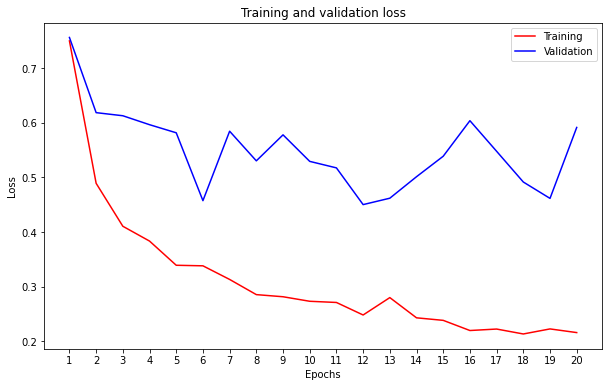

In [ ]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.title('Training and validation loss')
plt.legend()

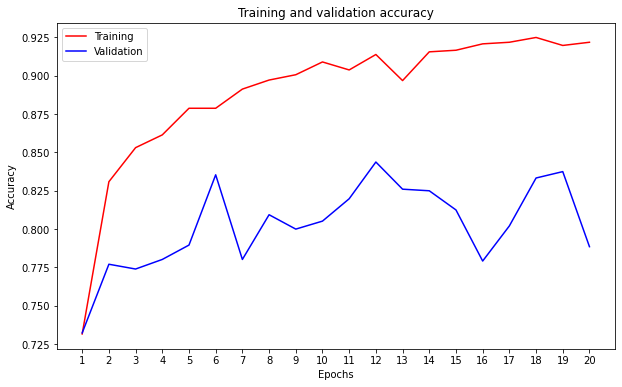

In [ ]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.title('Training and validation accuracy')
plt.legend()

# Test

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# load model
model = keras.models.load_model("/content/gdrive/MyDrive/Học kỳ 5/Nhập môn thị giác máy tính/Garbage classification/Save_model/VGG16/GarBage_Classification_InceptionV3_finetune.h5")

In [ ]:
# accuracy 
score = model.evaluate(test_generator)
print("Accuracy of test data: {:.2f}%".format(score[1]*100))

61/61 [==============================] - 7s 114ms/step - loss: 1.3404 - accuracy: 0.7159
Accuracy of test data: 71.59%


## Plot Confunsion matrix

In [ ]:
Y_pred = model.predict(test_generator, 961 // val_batch_size+1)
y_train_pred = np.argmax(Y_pred, axis=1)

Classification Report
              precision    recall  f1-score   support

   cardboard       0.64      0.98      0.78       160
       glass       0.74      0.80      0.77       161
       metal       0.66      0.85      0.74       159
       paper       0.98      0.55      0.70       160
     plastic       0.70      0.76      0.73       160
       trash       0.79      0.35      0.49       161

    accuracy                           0.72       961
   macro avg       0.75      0.72      0.70       961
weighted avg       0.75      0.72      0.70       961

Confusion Matrix


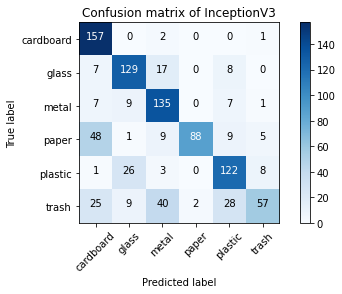

In [ ]:
labels = sorted(os.listdir('/content/Garbage classification/test'))

print('Classification Report')
print(classification_report(test_generator.classes, y_train_pred, target_names=labels, zero_division=1))

print('Confusion Matrix')
cnf_matrix = confusion_matrix(test_generator.classes, y_train_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labels, title='Confusion matrix of InceptionV3')